In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [56]:
data = np.load('/home/hlamarre/PycharmProjects/Avalanches/Saves/N32_Farhang_stats.npz')

In [67]:
e_l = data['e_l']
e_r = data['e_r']
a_r = data['a_r'][:-2]
a_e = data['a_e'][:-2]
a_t = data['a_t'][:-2]

In [68]:
def plot_(dat):
    plt.plot(np.linspace(0, len(dat), len(dat)), np.log(dat), alpha = 0.5)

In [73]:
print(a_e)

[ 1.90885141e+01  2.66094772e+00  1.41765261e+00  2.38339886e+00
  5.85319532e+01  6.08687899e-02  3.74514993e+00  1.54420585e+00
  1.99621226e+00  6.88881947e+00  1.41083811e+01  1.82744223e-02
  2.21335551e-01  6.01000162e-02  5.46752324e+00  8.24912490e+00
  9.96248107e-02  3.99662519e-01  4.16850460e-01  1.51758815e-01
  3.59319463e-01  7.63912405e-01  1.89806727e-01  3.20795321e+00
  1.07830124e+01  4.63706811e-01  4.48041701e-01  4.68414169e-01
  3.32157777e+00  2.45467777e+01  1.04389643e+01  1.73302362e+01
  4.90269695e+00  4.46742006e+00  4.78249361e+00  3.09036994e+02
  7.63414405e+02  6.05790688e+01  3.44812981e+01  5.84652779e+00
  2.57751394e-01  2.42513768e-01  1.37109330e+01  1.86563303e+01
  4.72889929e-02  3.32493303e+00  2.16322795e+00  1.28113324e+00
  3.86499183e+01  2.34121247e+00  2.58246609e+00  7.86589923e-01
  2.18628933e+00  1.28614523e+01  2.97054716e+00  8.78788210e-02
  1.46618678e+00  7.42160192e-01  2.37898527e+01  3.00744592e+01
  1.93674127e+00 -4.13557

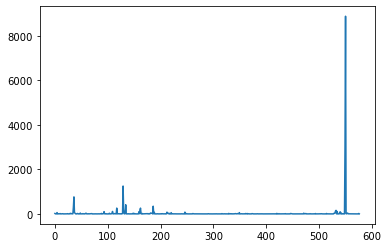

In [72]:
plt.plot(a_e)

<ipython-input-58-b632d6f86321>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.linspace(0, len(dat), len(dat)), np.log(dat), alpha = 0.5)
<ipython-input-58-b632d6f86321>:2: RuntimeWarning: invalid value encountered in log
  plt.plot(np.linspace(0, len(dat), len(dat)), np.log(dat), alpha = 0.5)


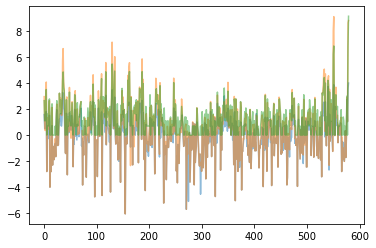

In [59]:
# plot_(e_l)
# plot_(e_r)
plt.figure()
plot_(a_r)
plot_(a_e)
plot_(a_t)
plt.show()

In [60]:
def line(x, a, b):  # equation of a line
    return -a * x + b
def hist_(array):
    space = np.logspace(np.log(min(array)), np.log(max(array)), 100, base=np.e)  # Logspace for the fitting
    hist = np.histogram(array, bins=space[10:-15], density=True)  # density histogram
    for i in range(len(hist[0])):  # transforms 0 into small values for no errors
        if hist[0][i] < 1e-15:
            hist[0][i] = 1e-15
    x = (hist[1][:-1] + hist[1][1:]) / 2  # Average the bins sides for the fitting
    popt, pcov = curve_fit(line, np.log(x[hist[0]>1e-10]), np.log(hist[0][hist[0]>1e-10]))  # fitting of the line
    plt.figure()
    plt.scatter(np.log(x[hist[0]>1e-10]), np.log(hist[0][hist[0]>1e-10]))
    plt.plot(np.log(x), line(np.log(x), popt[0], popt[1]))
    plt.show()
    print(popt[0])

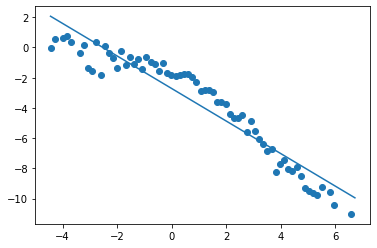

1.0761834549237006


In [74]:
hist_(a_e[a_e > 0])

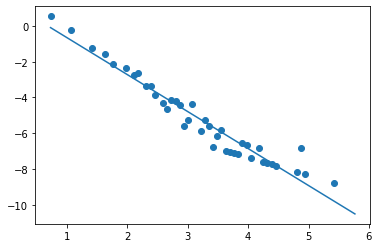

2.067633112374914


In [75]:
hist_(a_t)

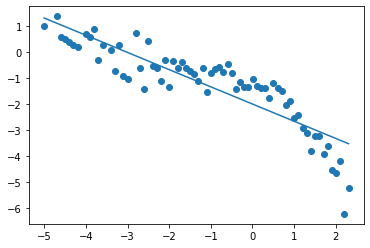

0.6612293303471267


In [76]:
hist_(a_r[a_r > 0])

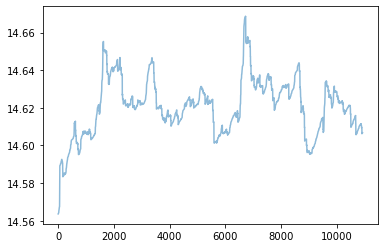

In [20]:
plt.figure()
plot_(a_r)
plt.show()